# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Dataset

In [2]:
df = pd.read_csv('fashion_boutique_dataset.csv')
df

,product_id,category,brand,season,size,color,original_price,markdown_percentage,current_price,purchase_date,stock_quantity,customer_rating,is_returned,return_reason
0,FB000001,Outerwear,Zara,Spring,XL,Red,196.01,0.0,196.01,2025-07-05,37,3.0,False,NaN
1,FB000002,Tops,Uniqlo,Winter,L,Pink,119.64,0.0,119.64,2025-08-06,2,2.5,False,NaN
2,FB000003,Accessories,Uniqlo,Winter,NaN,Black,33.80,0.0,33.80,2025-08-06,22,4.3,False,NaN
3,FB000004,Shoes,Uniqlo,Spring,XL,Black,75.36,0.0,75.36,2025-07-07,48,2.6,False,NaN
4,FB000005,Tops,Banana Republic,Winter,XL,Black,105.02,0.0,105.02,2025-08-06,10,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,FB002172,Tops,Mango,Summer,XL,Black,31.41,0.0,31.41,2025-08-06,10,2.1,False,NaN
2172,FB002173,Dresses,Banana Republic,Winter,L,Brown,50.58,0.0,50.58,2025-08-06,1,3.1,True,Changed Mind
2173,FB002174,Accessories,Banana Republic,Winter,NaN,Beige,79.37,54.8,35.88,2025-08-06,40,2.6,False,NaN
2174,FB002175,Bottoms,Ann Taylor,Summer,XL,Pink,105.52,0.0,105.52,2025-08-06,20,4.9,True,Size Issue


In [4]:
df.shape

(2176, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           2176 non-null   object 
 1   category             2176 non-null   object 
 2   brand                2176 non-null   object 
 3   season               2176 non-null   object 
 4   size                 1685 non-null   object 
 5   color                2176 non-null   object 
 6   original_price       2176 non-null   float64
 7   markdown_percentage  2176 non-null   float64
 8   current_price        2176 non-null   float64
 9   purchase_date        2176 non-null   object 
 10  stock_quantity       2176 non-null   int64  
 11  customer_rating      1814 non-null   float64
 12  is_returned          2176 non-null   bool   
 13  return_reason        320 non-null    object 
dtypes: bool(1), float64(4), int64(1), object(8)
memory usage: 223.3+ KB


In [7]:
df.describe(include='all')

,product_id,category,brand,season,size,color,original_price,markdown_percentage,current_price,purchase_date,stock_quantity,customer_rating,is_returned,return_reason
count,2176,2176,2176,2176,1685,2176,2176.000000,2176.000000,2176.000000,2176,2176.000000,1814.000000,2176,320
unique,2176,6,8,4,6,11,NaN,NaN,NaN,273,NaN,NaN,2,6
top,FB000001,Accessories,Zara,Summer,XS,Green,NaN,NaN,NaN,2025-08-06,NaN,NaN,False,Changed Mind
freq,1,402,313,575,301,222,NaN,NaN,NaN,1641,NaN,NaN,1856,68
mean,NaN,NaN,NaN,NaN,NaN,NaN,97.200340,12.144715,85.499596,NaN,24.937960,2.986604,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,51.637345,18.417786,50.091354,NaN,14.451387,1.159722,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,15.140000,0.000000,7.290000,NaN,0.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,57.872500,0.000000,46.845000,NaN,13.000000,2.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,88.600000,0.000000,74.885000,NaN,25.000000,3.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,127.630000,22.425000,112.865000,NaN,37.000000,4.000000,NaN,NaN


In [8]:
df.nunique()

product_id             2176
category                  6
brand                     8
season                    4
size                      6
color                    11
original_price         2061
markdown_percentage     458
current_price          2025
purchase_date           273
stock_quantity           51
customer_rating          41
is_returned               2
return_reason             6
dtype: int64

## Exploratory Data Analysis

In [9]:
df.isna().sum()

product_id                0
category                  0
brand                     0
season                    0
size                    491
color                     0
original_price            0
markdown_percentage       0
current_price             0
purchase_date             0
stock_quantity            0
customer_rating         362
is_returned               0
return_reason          1856
dtype: int64

In [10]:
df.duplicated().sum()

0

### Converting to Purchase Date to DateTime

In [12]:
df['purchase_date'] = pd.to_datetime(df['purchase_date'], format='%Y-%m-%d')
df['purchase_date']

0      2025-07-05
1      2025-08-06
2      2025-08-06
3      2025-07-07
4      2025-08-06
          ...    
2171   2025-08-06
2172   2025-08-06
2173   2025-08-06
2174   2025-08-06
2175   2025-08-06
Name: purchase_date, Length: 2176, dtype: datetime64[ns]

#### Add Month & Weekday

##### Month

In [13]:
df['Month'] = df['purchase_date'].dt.month_name()
df['Month']

0         July
1       August
2       August
3         July
4       August
         ...  
2171    August
2172    August
2173    August
2174    August
2175    August
Name: Month, Length: 2176, dtype: object

#### Weekday

In [14]:
df['Weekday'] = df['purchase_date'].dt.day_name()
df['Weekday']

0        Saturday
1       Wednesday
2       Wednesday
3          Monday
4       Wednesday
          ...    
2171    Wednesday
2172    Wednesday
2173    Wednesday
2174    Wednesday
2175    Wednesday
Name: Weekday, Length: 2176, dtype: object

In [15]:
df.fillna(0, inplace=True)
df

,product_id,category,brand,season,size,color,original_price,markdown_percentage,current_price,purchase_date,stock_quantity,customer_rating,is_returned,return_reason,Month,Weekday
0,FB000001,Outerwear,Zara,Spring,XL,Red,196.01,0.0,196.01,2025-07-05,37,3.0,False,0,July,Saturday
1,FB000002,Tops,Uniqlo,Winter,L,Pink,119.64,0.0,119.64,2025-08-06,2,2.5,False,0,August,Wednesday
2,FB000003,Accessories,Uniqlo,Winter,0,Black,33.80,0.0,33.80,2025-08-06,22,4.3,False,0,August,Wednesday
3,FB000004,Shoes,Uniqlo,Spring,XL,Black,75.36,0.0,75.36,2025-07-07,48,2.6,False,0,July,Monday
4,FB000005,Tops,Banana Republic,Winter,XL,Black,105.02,0.0,105.02,2025-08-06,10,0.0,False,0,August,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,FB002172,Tops,Mango,Summer,XL,Black,31.41,0.0,31.41,2025-08-06,10,2.1,False,0,August,Wednesday
2172,FB002173,Dresses,Banana Republic,Winter,L,Brown,50.58,0.0,50.58,2025-08-06,1,3.1,True,Changed Mind,August,Wednesday
2173,FB002174,Accessories,Banana Republic,Winter,0,Beige,79.37,54.8,35.88,2025-08-06,40,2.6,False,0,August,Wednesday
2174,FB002175,Bottoms,Ann Taylor,Summer,XL,Pink,105.52,0.0,105.52,2025-08-06,20,4.9,True,Size Issue,August,Wednesday


## Visualization

### 1. Original Price By Weekday

In [16]:
weekday_sales = df.groupby('Weekday')['original_price'].sum()

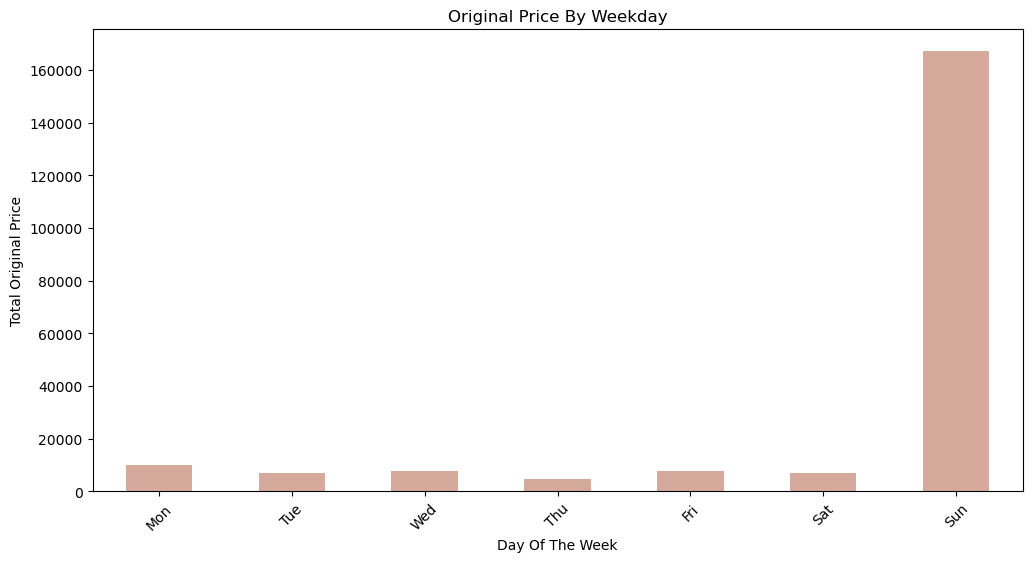

In [18]:
weekday_sales.plot(kind='bar', color='#D6A99D', figsize=(12, 6))
plt.title('Original Price By Weekday')
plt.xlabel('Day Of The Week')
plt.ylabel('Total Original Price')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()

### 2. Current Price By Weekday

In [19]:
weekday_price = df.groupby('Weekday')['current_price'].sum()

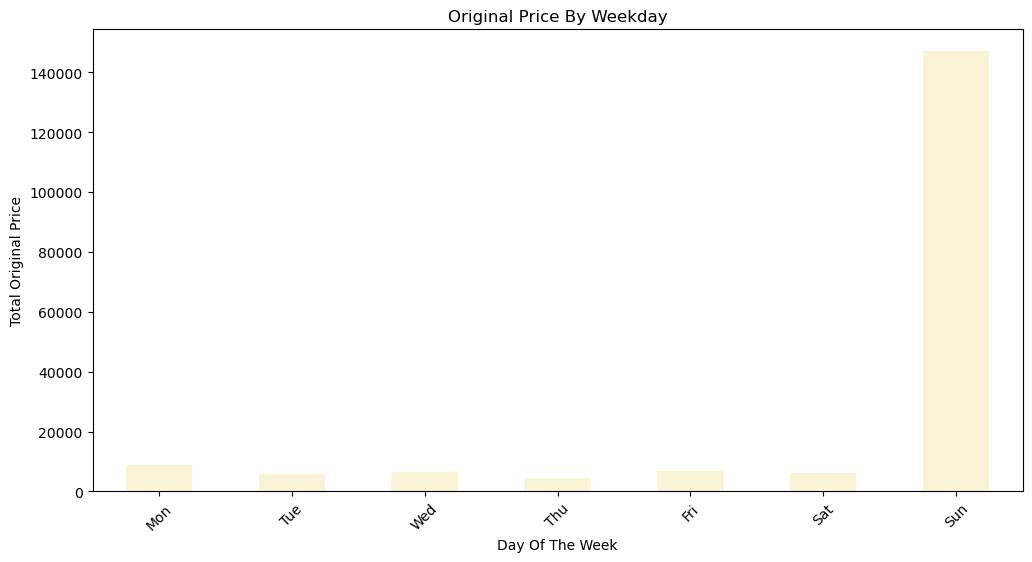

In [20]:
weekday_price.plot(kind='bar', color='#FBF3D5', figsize=(12, 6))
plt.title('Original Price By Weekday')
plt.xlabel('Day Of The Week')
plt.ylabel('Total Original Price')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()

### 3. Original Price By Month

In [21]:
monthly_sales = df.groupby('Month')['original_price'].sum()

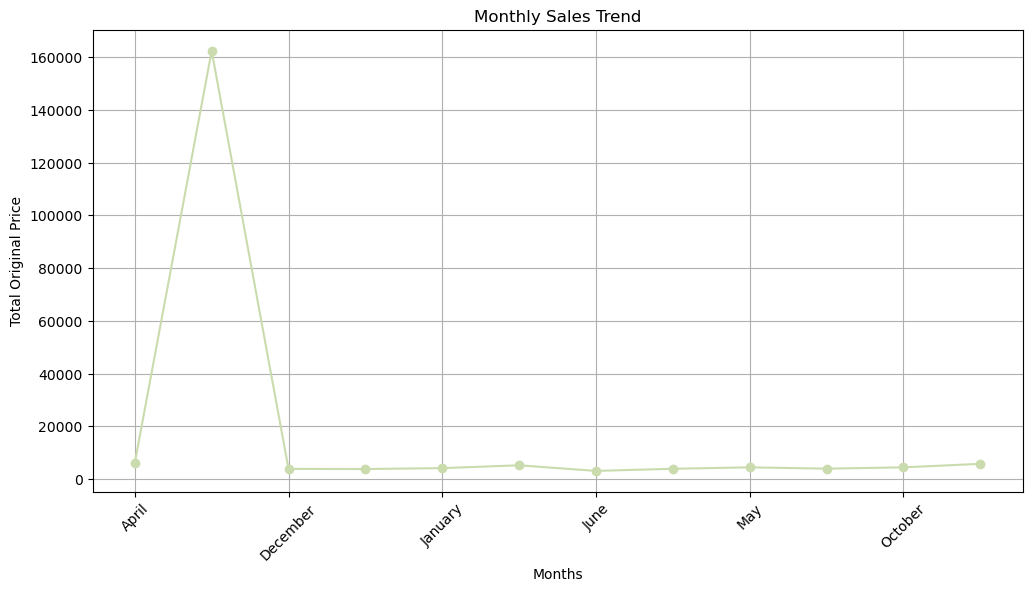

In [28]:
monthly_sales.plot(kind='line', marker='o', color='#CADCAE', figsize=(12, 6))
plt.title('Monthly Sales Trend')
plt.xlabel('Months')
plt.ylabel('Total Original Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 4. Top Selling Category

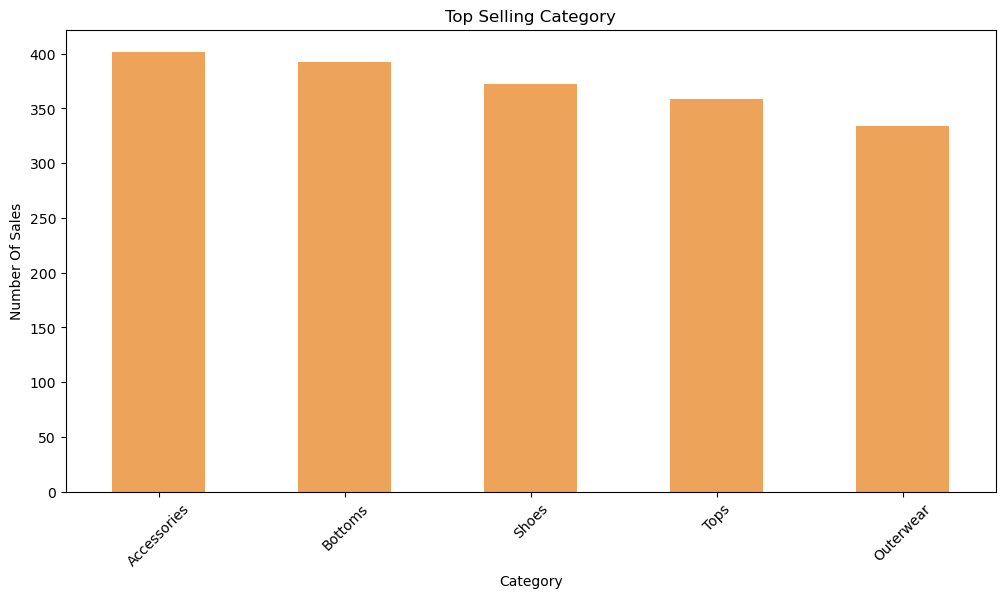

In [29]:
df['category'].value_counts().head(5).plot(kind='bar', color='#EDA35A', figsize=(12, 6))
plt.title('Top Selling Category')
plt.xlabel('Category')
plt.ylabel('Number Of Sales')
plt.xticks(rotation=45)
plt.show()

### 5. Top Selling Brand

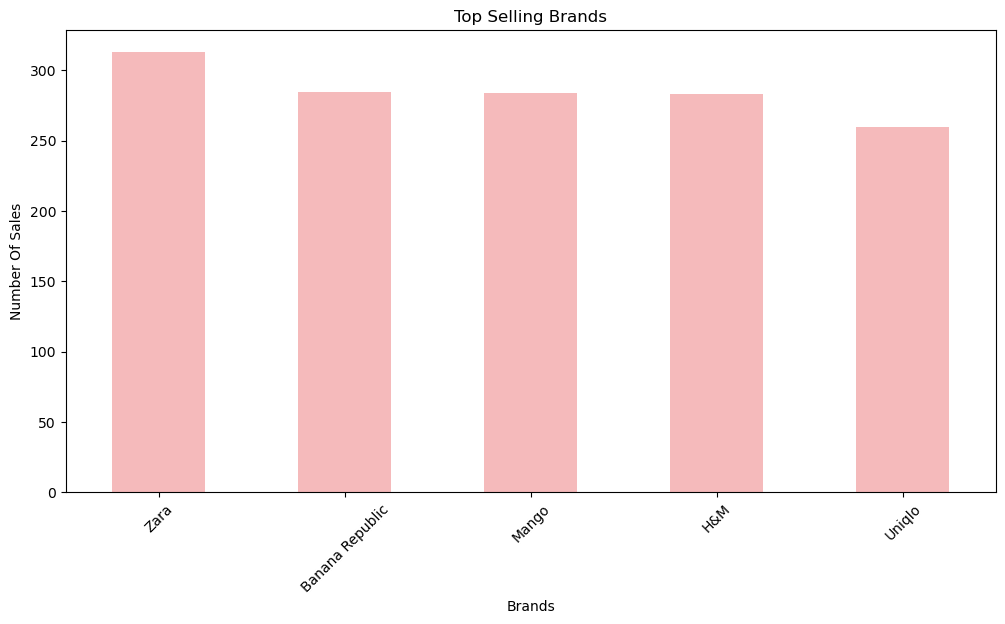

In [32]:
df['brand'].value_counts().head(5).plot(kind='bar', color='#F5BABB', figsize=(12, 6))
plt.title('Top Selling Brands')
plt.xlabel('Brands')
plt.ylabel('Number Of Sales')
plt.xticks(rotation=45)
plt.show()

### 6. Total Revenue By Category

In [34]:
top_revenue_category = df.groupby('category')['current_price'].sum().sort_values(ascending=False).head(5)
top_revenue_category

category
Outerwear    48672.81
Shoes        41152.78
Dresses      31028.35
Bottoms      24079.39
Tops         23719.91
Name: current_price, dtype: float64

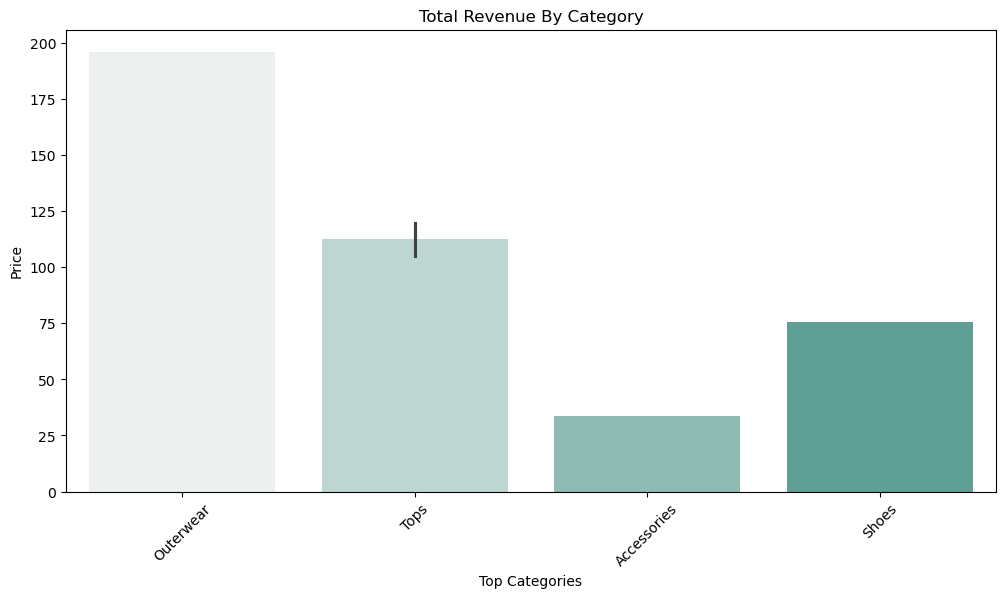

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['category'].head(5), y=df['current_price'], palette='light:#5A9')
plt.title('Total Revenue By Category')
plt.xlabel('Top Categories')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

### 7. Total Revenue By Brand

In [37]:
top_revenue_brand = df.groupby('brand')['current_price'].sum().sort_values(ascending=False).head(5)
top_revenue_brand

brand
Zara               26543.59
Banana Republic    25556.00
Mango              25100.04
H&M                24283.71
Uniqlo             23830.51
Name: current_price, dtype: float64

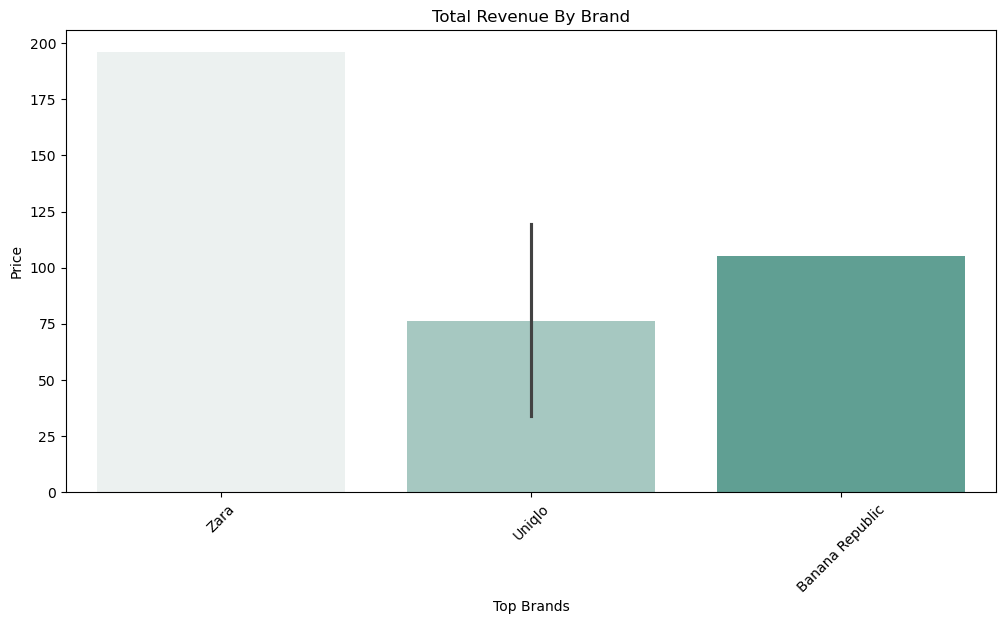

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['brand'].head(5), y=df['current_price'], palette='light:#5A9')
plt.title('Total Revenue By Brand')
plt.xlabel('Top Brands')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

## Predictive Modeling

In [40]:
df = df.drop(['product_id'], axis=1)

In [42]:
df = df.drop(['Month'], axis=1)

In [43]:
df = df.drop(['Weekday'], axis=1)

In [44]:
num_cols = ['original_price', 'markdown_percentage', 'current_price', 'stock_quantity', 'customer_rating']
cat_cols = ['category', 'brand', 'season', 'size', 'color', 'is_returned', 'return_reason']

print(len(num_cols))
print(len(cat_cols))

5
7


### 1. Train Test Split

In [46]:
features = ['original_price', 'markdown_percentage', 'current_price', 'stock_quantity', 'customer_rating']
target = 'is_returned'

X = df[features]
y = df[target]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(1740, 5) (436, 5)


### 2. Models

In [48]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decison Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

In [49]:
best_model = None
best_accuracy = 0
best_model_name = ''

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\n {name} Accuracy: {accuracy}')


 Logistic Regression Accuracy: 0.8876146788990825

 Decison Tree Accuracy: 0.7408256880733946

 Random Forest Accuracy: 0.8784403669724771

 Gradient Boosting Accuracy: 0.8830275229357798

 K-Nearest Neighbors Accuracy: 0.8509174311926605

 Support Vector Machine Accuracy: 0.8876146788990825


#### Best Model

In [50]:
if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_model = model
    best_model_name = name
    print(f'\n Best Model: {best_model_name} with Accuracy: {best_accuracy}')


 Best Model: Support Vector Machine with Accuracy: 0.8876146788990825


### 3. Classification Report

In [51]:
y_pred_best = best_model.predict(X_test)
print(f'\n Classification Report: \n', classification_report(y_test, y_pred_best))


 Classification Report: 
               precision    recall  f1-score   support

       False       0.89      1.00      0.94       387
        True       0.00      0.00      0.00        49

    accuracy                           0.89       436
   macro avg       0.44      0.50      0.47       436
weighted avg       0.79      0.89      0.83       436



### 4. Confusion Matrix

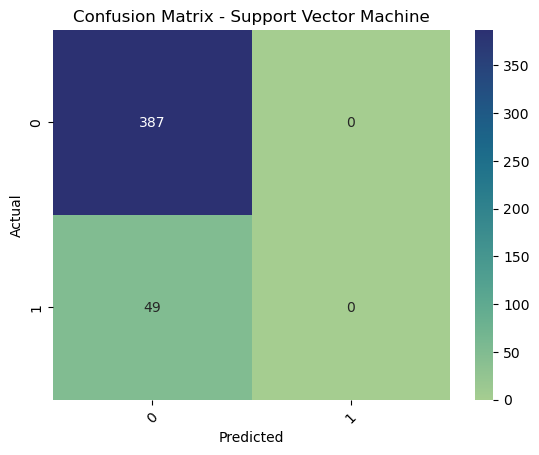

In [52]:
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.show()